## 2.3 Skill Prediction en LinkedIN

En esta sección se trabajará con un dataset correspondiente a las competencias declaradas por usuarios de LinkedIN, red social orientada a la formación de contactos profesionales y de negocios.

### 2.3.a Generar matriz dispersa.

In [2]:
#3.a
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
user_skill = pd.read_csv('user_skill', sep=":", header = None)
user_skill.columns = ['user','skills']
user_skill = user_skill.drop('user', axis=1)
user_skill = pd.DataFrame(user_skill)
user_skill = pd.DataFrame(user_skill.skills.str.split(',',0).tolist())  
df = csr_matrix((7890, 14544), dtype=np.int8).toarray()
for i in range(0,7890):
    for j in range (0,50):
        if (user_skill[j][i]!=None):
            id_skill = int(user_skill[j][i])
            df[i][id_skill] = id_skill
print df #Matriz dispersa 7890 x 14544 donde los 1 equivale que el user tiene la habilidad # siendo esta entre 0 y 14543.
df.shape

[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]


(7890, 14544)

Se genera una matriz dispersa 7890x14544 en donde el usuario i contiene la habilidad j se asigna un 1, en caso contrario un 0. Las habilidades varían entre 0 y 14544, para un número de 7890 usuarios.

### 2.3.b Generar matrices de Entrenamiento y Prueba.

In [3]:
#3.b
import numpy as np
from sklearn.cross_validation import train_test_split
z_train, z_test = train_test_split(df, test_size=0.30, random_state=0)
print "Tamaño matriz training set: " + str(z_train.shape)
print "Tamaño matriz testing set: " + str(z_test.shape)

Tamaño matriz training set: (5523, 14544)
Tamaño matriz testing set: (2367, 14544)


Se divide la matriz en dos sub-matrices, estas representan los datos de entrenamiento y prueba. Se buscó tener una matriz de entrenamiento mayor a la de prueba, por lo que se asignó de forma aleatória que 70% de los datos de la matriz original a la matriz de entrenamiento y el 30% restante a la matriz de prueba, obteniendo como resultado las matrices de tamaños (5523, 14544) y (2367, 14544).


### 2.3.c Gráfico de número de usuarios con respecto a la competencia.

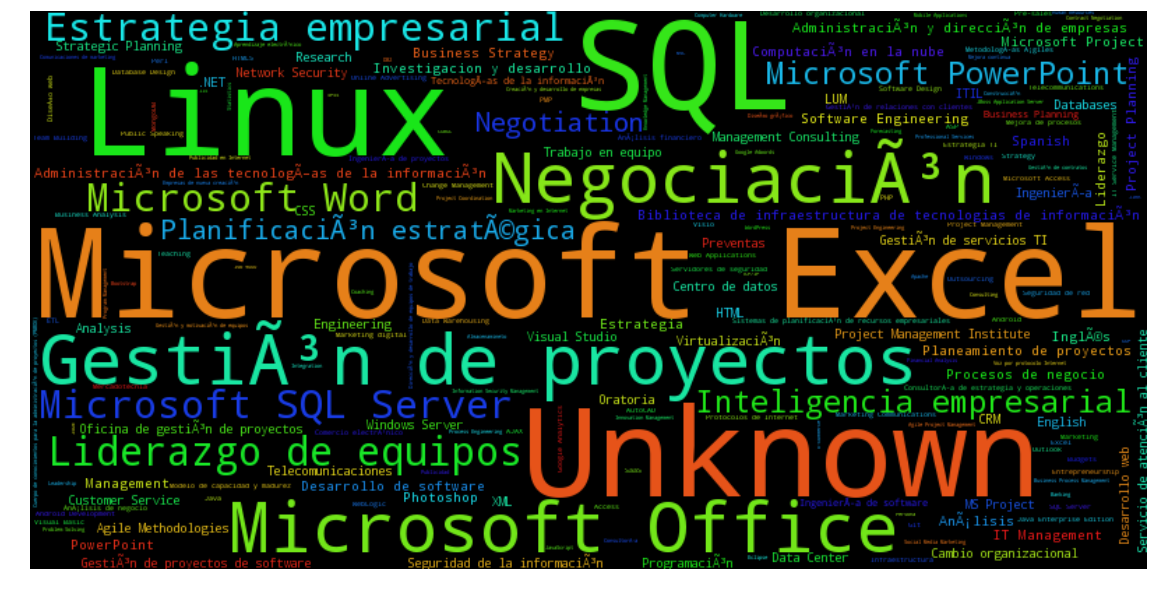

In [4]:
#3.c
from wordcloud import WordCloud
import image
import matplotlib.pyplot as plt
%matplotlib inline

# Lectura del archivo skill_id
skill_id = pd.read_csv('skill_id', sep=" :", header = None, engine='python')
skill_id.columns = ['skill','id']
skill_id = skill_id.drop('id', axis=1)
skill_id = pd.DataFrame(skill_id)
skill_id = skill_id.T

# Suma de columnas de la csr_matrix df
suma_skills = pd.DataFrame(df.sum(0))
suma_skills.columns = ['cantidad']
suma_skills = suma_skills.T

# Concatenacion de skill_id y suma_skills, queda un dataframe de 14544x2
frames = [skill_id, suma_skills]
result = pd.concat(frames)
result = result.T

# Proceso para graficar con wordcloud
tuples = [tuple(x) for x in result.values]
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(tuples)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

De lo obtenido en el gráfico de nube de palabras se observa que las palabras con mayores tamaños, y que por ende son las con mayor frecuencia en las personas que dicen tener esa habilidad, son Microsoft Excel, Linux, SQL, Negociación, gestión de proyectos y "unknown"(variable sin nombre en los datos que se corrigió manualmente).

Es posible presumir que los usuarios de LinkedIN en su mayoría son personas que pueden trabajar en cualquier empresa clásica dirigiendo y organizando personal además de poder realizar algunos trabajos menores de secretaría y finanzas.

### 2.3.d Construcción de matrices para predicción de competencias.

In [5]:
#3.d
X_train = np.delete(z_train, 71, 1)
y_train = z_train[:,71]
y_train = y_train.reshape((5523,1))
print "Skill seleccionado: Microsoft Excel (id 71)"
print " "
print "Matriz X_train:"
print X_train
print " "
print "Tamaño matriz X_train: " + str(X_train.shape)
print " "
print "Matriz y_train:"
print y_train
print " "
print "Tamaño matriz y_train: " + str(y_train.shape)
print " "

X_test = np.delete(z_test, 71, 1)
y_test = z_test[:,71]
y_test = y_test.reshape((2367,1))

print "Matriz X_test:"
print X_test
print " "
print "Tamaño matriz X_test: " + str(X_test.shape)
print " "
print "Matriz y_test:"
print y_test
print " "
print "Tamaño matriz y_test: " + str(y_test.shape)

Skill seleccionado: Microsoft Excel (id 71)
 
Matriz X_train:
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
 
Tamaño matriz X_train: (5523, 14543)
 
Matriz y_train:
[[71]
 [ 0]
 [ 0]
 ..., 
 [ 0]
 [ 0]
 [ 0]]
 
Tamaño matriz y_train: (5523, 1)
 
Matriz X_test:
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
 
Tamaño matriz X_test: (2367, 14543)
 
Matriz y_test:
[[ 0]
 [ 0]
 [ 0]
 ..., 
 [ 0]
 [71]
 [ 0]]
 
Tamaño matriz y_test: (2367, 1)


Se escoge como objetivo la skill "Microsoft Excel" cuya id es 71. Recordar que esta variable parecía ser la que más se repetía cuando se realizó el gráfico de competencias entre todos los usuarios, por lo que es probable que siga estando en los primeros lugares dentro del set de entrenamiento.

### 2.3.e Entrenamiento de clasificadores.

In [ ]:
#3.e
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

model1 = BernoulliNB()
model1 = model1.fit(X_train,y_train.values.ravel())

model2 = MultinomialNB()
model2 = model2.fit(X_train, y_train.values.ravel())

model3 = LogisticRegression(penalty='l2',C=0.01)
model3 = model3.fit(X_train, y_train.values.ravel())

model4 = LinearSVC(C=0.01)
model4 = model4.fit(X_train, y_train.values.ravel())

-


### 2.3.f Predicción de otras competencias.

In [ ]:
#3.f

-